# Assignment 1: Simulated Annealing and Sampling
#### Timur Khazhiev BS4-DS2

## Task 1

In [1]:
import numpy as np 

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras import backend as K

Using TensorFlow backend.


In [0]:
# Dataset extraction
iris = datasets.load_iris()
x = iris["data"]
y_ = iris["target"].reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [3]:
# Defining model
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='relu1', use_bias=False))
model.add(Dense(10, activation='relu', name='relu2', use_bias=False))
model.add(Dense(3, activation='softmax', name='sotfmax', use_bias=False))

optimizer = Adam(lr=0.001) # Optimizer is used to compile
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())






Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu1 (Dense)                (None, 10)                40        
_________________________________________________________________
relu2 (Dense)                (None, 10)                100       
_________________________________________________________________
sotfmax (Dense)              (None, 3)                 30        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Simulated annealing parameters
T = 100.0
T_min = 1e-8
anneal_rate = 0.1
max_steps = 100

In [5]:
results = model.evaluate(test_x, test_y, verbose=0)

print('Initial test set loss: {:4f}'.format(results[0]))
print('Initial test set accuracy: {:4f}'.format(results[1]))







Initial test set loss: 2.130106
Initial test set accuracy: 0.300000


In [6]:
# Simulated annealing
import timeit
start = timeit.default_timer()

while T > T_min:
  for step in range(max_steps):
    old_results = model.evaluate(train_x, train_y, verbose = 0) 
    weights = model.get_weights()
    old_weights = model.get_weights() # save to revert in case
    sigma = 0.5

    # Generate new weights
    for layer_id in range(len(weights)):
      for neurons_id in range(len(weights[layer_id])):
        for weight_id in range(len(weights[layer_id][neurons_id])):
          weights[layer_id][neurons_id][weight_id] = \
          np.random.normal(weights[layer_id][neurons_id][weight_id], sigma)

    # Set them to model and calculate loss and accuracy
    model.set_weights(weights)
    results = model.evaluate(train_x, train_y, verbose = 0)
    
    if old_results[0] < results[0]:
      acceptance_ratio = np.exp((old_results[0] - results[0]) / T)
      u = np.random.normal(1, 0)
      if u > acceptance_ratio:
        model.set_weights(old_weights) # If not accepted - we revert
  
  resuls = model.evaluate(train_x, train_y, verbose = 0)
  print('Temperature {:.10f} train set loss: {:4f}'.format(T, results[0]))
  print('Temperature {:.10f} train set accuracy: {:4f}\n'.format(T, results[1]))
  T *= anneal_rate

stop = timeit.default_timer()
print('Time: ', stop - start) 

Temperature 100.0000000000 train set loss: 10.611080
Temperature 100.0000000000 train set accuracy: 0.341667

Temperature 10.0000000000 train set loss: 2.341181
Temperature 10.0000000000 train set accuracy: 0.658333

Temperature 1.0000000000 train set loss: 5.674552
Temperature 1.0000000000 train set accuracy: 0.341667

Temperature 0.1000000000 train set loss: 6.243382
Temperature 0.1000000000 train set accuracy: 0.341667

Temperature 0.0100000000 train set loss: 10.745397
Temperature 0.0100000000 train set accuracy: 0.333333

Temperature 0.0010000000 train set loss: 10.611085
Temperature 0.0010000000 train set accuracy: 0.341667

Temperature 0.0001000000 train set loss: 7.676317
Temperature 0.0001000000 train set accuracy: 0.150000

Temperature 0.0000100000 train set loss: 9.169490
Temperature 0.0000100000 train set accuracy: 0.325000

Temperature 0.0000010000 train set loss: 10.265129
Temperature 0.0000010000 train set accuracy: 0.325000

Temperature 0.0000001000 train set loss: 4.19

In [7]:
results = model.evaluate(test_x, test_y, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.323370
Final test set accuracy: 0.833333


## Task 2

In [0]:
import pandas as pd

In [9]:
cities = pd.read_csv('city.csv')

cities = cities.drop([
    'postal_code', 'country', 'federal_district', 'region_type', 'region',
    'area_type', 'area', 'city_type', 'city', 'settlement_type', 'settlement',
    'kladr_id', 'fias_id', 'capital_marker', 'okato', 'oktmo', 'tax_office',
    'timezone', 'foundation_year', 'fias_level'
], axis=1)

cities['address'] = [x.split(' ')[-1] for x in cities.address]

form = lambda x : int(x) if x[-1] != ']' else int(x[:-3])
cities['population'] = [form(x) for x in cities.population]
cities = cities.sort_values(by=['population'], ascending=False)[:30]
cities

,address,geo_lat,geo_lon,population
509,Москва,55.754047,37.620405,11514330
786,Санкт-Петербург,59.939131,30.315900,4848742
647,Новосибирск,55.028191,82.921149,1498921
832,Екатеринбург,56.838522,60.605491,1377738
619,Новгород,56.324063,44.005391,1250615
927,Казань,55.794358,49.111497,1216965
782,Самара,53.195031,50.106952,1164900
656,Омск,54.984857,73.367452,1154000
1064,Челябинск,55.160262,61.400808,1130273
757,Ростов-на-Дону,47.222457,39.718803,1091544


In [0]:
# Ref: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians, exp

def distance(city1, city2):
  R = 6373.0

  lat1, lon1 = radians(city1.geo_lat), radians(city1.geo_lon)
  lat2, lon2 = radians(city2.geo_lat), radians(city2.geo_lon)

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  dist = R * c
  return dist

def calc_path(path, df):
  dist = 0
  for i in range(len(path) - 1):
    dist += distance(df.iloc[path[i]], df.iloc[path[i + 1]])
  dist += distance(df.iloc[path[0]], df.iloc[path[-1]])
  return dist

def acceptance_probability(energy, new_energy, temperature):
  return exp((energy - new_energy) / temperature) if energy <= new_energy else 1

def plot_path(best_path):
  x = [cities.iloc[city].geo_lon for city in best_path]
  x.append(cities.iloc[best_path[0]].geo_lon)
  y = [cities.iloc[city].geo_lat for city in best_path]
  y.append(cities.iloc[best_path[0]].geo_lat)
  plt.plot(x, y, '-o', color='blue')
    
  plt.show()

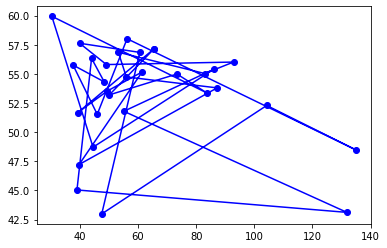

Distance: 60722.30577802368


In [11]:
# Generate initial random path
from random import shuffle, randrange
import matplotlib.pyplot as plt
path = list(range(30))
shuffle(path)
plot_path(path)
print("Distance:",calc_path(path, cities))
best_path = path.copy()

In [0]:
# Simulated annealing parameters
T = 1000.0
T_min = 1e-8
anneal_rate = 0.1
max_steps = 100

Temperature 1000.0000000000 path distance: 39429.265959
Temperature 100.0000000000 path distance: 31159.174426
Temperature 10.0000000000 path distance: 29363.148763
Temperature 1.0000000000 path distance: 28536.991093
Temperature 0.1000000000 path distance: 27493.582774
Temperature 0.0100000000 path distance: 26690.183680
Temperature 0.0010000000 path distance: 26238.708155
Temperature 0.0001000000 path distance: 26074.756663
Temperature 0.0000100000 path distance: 25732.318300
Temperature 0.0000010000 path distance: 25524.362027
Temperature 0.0000001000 path distance: 25146.427508
Temperature 0.0000000100 path distance: 24641.446325


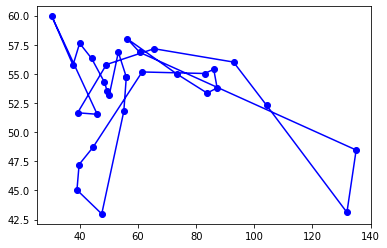

Time:  54.16288033099954
Final best path distance:  24641.446324926805


In [13]:
# Ref. http://www.theprojectspot.com/tutorial-post/simulated-annealing-algorithm-for-beginners/6
steps = 0
start = timeit.default_timer()

while T > T_min:
  new_path = path.copy()
  
  path_pos1 = randrange(0, len(path), 1)
  path_pos2 = randrange(0, len(path), 1)

  city_swap1 = new_path[path_pos1]
  city_swap2 = new_path[path_pos2]

  new_path[path_pos2] = city_swap1
  new_path[path_pos1] = city_swap2

  current_energy = calc_path(path, cities)
  new_energy = calc_path(new_path, cities)

  if acceptance_probability(current_energy, new_energy, T) >= np.random.rand():
    path = new_path.copy()

  if calc_path(path, cities) < calc_path(best_path, cities):
    best_path = path.copy()

  if steps > 0 and steps % max_steps == 0:
        print('Temperature {:.10f} path distance: {:4f}'.format(T, calc_path(path, cities)))        
        T *= anneal_rate

  steps += 1

stop = timeit.default_timer()  
plot_path(best_path)
print('Time: ', stop - start)
print('Final best path distance: ', calc_path(best_path, cities))

### Playground for Task 1
For several opimizers on the same model


In [14]:
# Defining another model
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='relu1', use_bias=False))
model.add(Dense(10, activation='relu', name='relu2', use_bias=False))
model.add(Dense(3, activation='softmax', name='sotfmax', use_bias=False))

optimizer = SGD(lr=0.01) 
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu1 (Dense)                (None, 10)                40        
_________________________________________________________________
relu2 (Dense)                (None, 10)                100       
_________________________________________________________________
sotfmax (Dense)              (None, 3)                 30        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
results = model.evaluate(test_x, test_y, verbose=0)

print('Initial test set loss: {:4f}'.format(results[0]))
print('Initial test set accuracy: {:4f}'.format(results[1]))

# Train the model
start = timeit.default_timer()
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

stop = timeit.default_timer()
print('Time: ', stop - start) 

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Initial test set loss: 2.909125
Initial test set accuracy: 0.300000
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
 - 0s - loss: 1.3663 - acc: 0.6250
Epoch 2/200
 - 0s - loss: 0.8516 - acc: 0.6583
Epoch 3/200
 - 0s - loss: 0.7626 - acc: 0.6167
Epoch 4/200
 - 0s - loss: 0.6836 - acc: 0.6667
Epoch 5/200
 - 0s - loss: 0.6301 - acc: 0.6417
Epoch 6/200
 - 0s - loss: 0.5799 - acc: 0.6333
Epoch 7/200
 - 0s - loss: 0.5446 - acc: 0.6917
Epoch 8/200
 - 0s - loss: 0.5207 - acc: 0.7083
Epoch 9/200
 - 0s - loss: 0.4915 - acc: 0.7500
Epoch 10/200
 - 0s - loss: 0.4740 - acc: 0.8333
Epoch 11/200
 - 0s - loss: 0.4536 - acc: 0.8750
Epoch 12/200
 - 0s - loss: 0.4343 - acc: 0.7500
Epoch 13/200
 - 0s - loss: 0.4163 - acc: 0.8583
Epoch 14/200
 - 0s - loss: 0.3945 - acc: 0.9000
Epoch 15/200
 - 0s - loss: 0.3768 - acc: 0.9000
Epoch 16/200
 - 0s - loss: 0.3684 - acc: 0.9417
Epoch 17/200
 - 0s - loss: 0.3590 - acc: 0.8917
Epoch 18/200
 - 0s - loss: 0.